# Setup

In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"

In [1]:
# Add directory above current directory to path
import sys

sys.path.insert(0, '..')

In [2]:
import json
import glob
from utils.metrics import extract_metrics_config, Metric

In [3]:
file_list = glob.glob('./experiments/configs/*flickr30k*.json')

configs = [json.load(open(file)) for file in file_list]

In [4]:
# add prefix to path

for config in configs:
    config["model"]["training"][
        "log_dir"] = "experiments/" + config["model"]["training"]["log_dir"]

# Load metrics

In [5]:
metrics = [Metric(**extract_metrics_config(config)) for config in configs]

# ROC Curve

[[<matplotlib.lines.Line2D at 0x1dde68f7be0>],

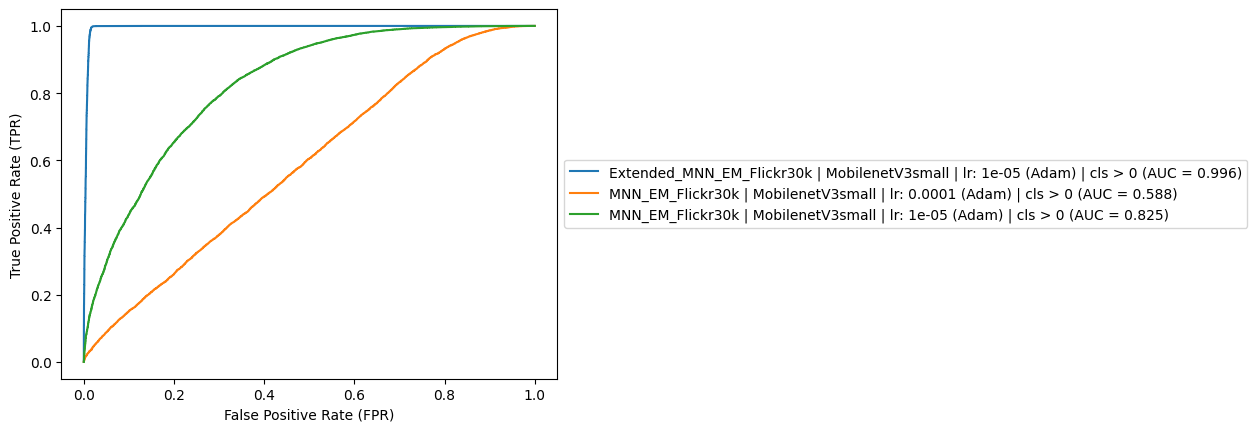

In [6]:
[metric.plot_roc() for metric in metrics]

# Precision-Recall Curve (PRC)

[[<matplotlib.lines.Line2D at 0x1dde6982d30>],

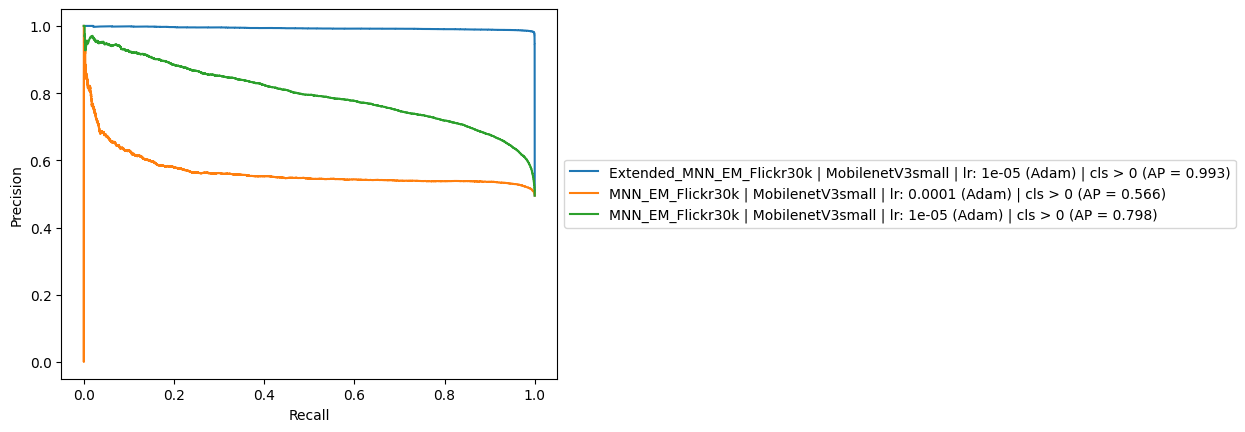

In [7]:
[metric.plot_prc() for metric in metrics]

# Optimal accuracy

The `optimize_threshold()` method calculates and outputs optimal threshold for ROC curve using G-Mean and Youden-Index/J, as well as the optimal threshold for Precision-Recall curve using F-Score.

See also https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

In [8]:
import pandas as pd

In [9]:
metrics_df = pd.DataFrame.from_dict(
    [metric.optimize_threshold() for metric in metrics])

# select metrics relevant for paper
metrics_df = metrics_df[["Model name", "Image CNN", "lr", "AUC-ROC", "AUC-PRC", "Precision", "Recall", "F-Score", "Threshold F-Score", "Accuracy F-Score"]]
metrics_df[["AUC-ROC", "AUC-PRC", "Precision", "Recall", "F-Score", "Threshold F-Score"]] = metrics_df[["AUC-ROC", "AUC-PRC", "Precision", "Recall", "F-Score", "Threshold F-Score"]].round(4)
metrics_df["Accuracy F-Score"] = metrics_df["Accuracy F-Score"] * 100
metrics_df["Accuracy F-Score"] = metrics_df["Accuracy F-Score"].round(2)
metrics_df["Accuracy F-Score"] = metrics_df["Accuracy F-Score"].astype(str)
metrics_df["Accuracy F-Score"] = metrics_df["Accuracy F-Score"] + " %"

# All models ranked by Accuracy

In [10]:
metrics_df.sort_values(by="Accuracy F-Score", ascending=False)

,Model name,Image CNN,lr,AUC-ROC,AUC-PRC,Precision,Recall,F-Score,Threshold F-Score,Accuracy F-Score
0,Extended_MNN_EM_Flickr30k,MobilenetV3small,0.00001,0.9956,0.9931,0.9816,0.9976,0.9895,0.9765,98.95 %
2,MNN_EM_Flickr30k,MobilenetV3small,0.00001,0.8250,0.7981,0.6766,0.9006,0.7727,0.3309,73.76 %
1,MNN_EM_Flickr30k,MobilenetV3small,0.00010,0.5875,0.5659,0.5267,0.9681,0.6822,0.0000,55.33 %


In [15]:
print(metrics_df.sort_values(by="Accuracy F-Score", ascending=False).to_latex(index=False))

\begin{tabular}{llrrrrrrrl}
\toprule
               Model name &        Image CNN &      lr &  AUC-ROC &  AUC-PRC &  Precision &  Recall &  F-Score &  Threshold F-Score & Accuracy F-Score \\
\midrule
Extended\_MNN\_EM\_Flickr30k & MobilenetV3small & 0.00001 &   0.9956 &   0.9931 &     0.9816 &  0.9976 &   0.9895 &             0.9765 &          98.95 \% \\
         MNN\_EM\_Flickr30k & MobilenetV3small & 0.00001 &   0.8250 &   0.7981 &     0.6766 &  0.9006 &   0.7727 &             0.3309 &          73.76 \% \\
         MNN\_EM\_Flickr30k & MobilenetV3small & 0.00010 &   0.5875 &   0.5659 &     0.5267 &  0.9681 &   0.6822 &             0.0000 &          55.33 \% \\
\bottomrule
\end{tabular}



# MNN-EM

In [11]:
metrics_df[metrics_df["Model name"].str.startswith("MNN_EM")].sort_values(by="Accuracy F-Score", ascending=False)

,Model name,Image CNN,lr,AUC-ROC,AUC-PRC,Precision,Recall,F-Score,Threshold F-Score,Accuracy F-Score
2,MNN_EM_Flickr30k,MobilenetV3small,0.00001,0.8250,0.7981,0.6766,0.9006,0.7727,0.3309,73.76 %
1,MNN_EM_Flickr30k,MobilenetV3small,0.00010,0.5875,0.5659,0.5267,0.9681,0.6822,0.0000,55.33 %


In [12]:
print(metrics_df[metrics_df["Model name"].str.startswith("MNN_EM")].sort_values(by="Accuracy F-Score", ascending=False).to_latex(index=False))

\begin{tabular}{llrrrrrrrl}
\toprule
      Model name &        Image CNN &      lr &  AUC-ROC &  AUC-PRC &  Precision &  Recall &  F-Score &  Threshold F-Score & Accuracy F-Score \\
\midrule
MNN\_EM\_Flickr30k & MobilenetV3small & 0.00001 &   0.8250 &   0.7981 &     0.6766 &  0.9006 &   0.7727 &             0.3309 &          73.76 \% \\
MNN\_EM\_Flickr30k & MobilenetV3small & 0.00010 &   0.5875 &   0.5659 &     0.5267 &  0.9681 &   0.6822 &             0.0000 &          55.33 \% \\
\bottomrule
\end{tabular}



# Extended MNN-EM

In [13]:
metrics_df[metrics_df["Model name"].str.startswith("Extended_MNN_EM")].sort_values(by="Accuracy F-Score", ascending=False)

,Model name,Image CNN,lr,AUC-ROC,AUC-PRC,Precision,Recall,F-Score,Threshold F-Score,Accuracy F-Score
0,Extended_MNN_EM_Flickr30k,MobilenetV3small,0.00001,0.9956,0.9931,0.9816,0.9976,0.9895,0.9765,98.95 %


In [14]:
print(metrics_df[metrics_df["Model name"].str.startswith("Extended_MNN_EM")].sort_values(by="Accuracy F-Score", ascending=False).to_latex(index=False))

\begin{tabular}{llrrrrrrrl}
\toprule
               Model name &        Image CNN &      lr &  AUC-ROC &  AUC-PRC &  Precision &  Recall &  F-Score &  Threshold F-Score & Accuracy F-Score \\
\midrule
Extended\_MNN\_EM\_Flickr30k & MobilenetV3small & 0.00001 &   0.9956 &   0.9931 &     0.9816 &  0.9976 &   0.9895 &             0.9765 &          98.95 \% \\
\bottomrule
\end{tabular}

